<a href="https://colab.research.google.com/github/VSasikala/github-slideshow/blob/master/Copy_of_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
K.clear_session()

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
training_data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/tomato/train", seed=42, image_size= (img_height, img_width), batch_size=batch_size)

Found 1458 files belonging to 10 classes.


In [ ]:
valid_data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/tomato/val", seed=42, image_size= (img_height, img_width), batch_size=batch_size)

Found 1000 files belonging to 10 classes.


In [ ]:
target_names = training_data.class_names
print(target_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (250, 250, 3),
kernel_size = (11, 11), strides = (4, 4),
padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Flattening
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape = (250*250*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# Output Softmax Layer
model.add(Dense(len(target_names)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 96)        34944     
                                                                 
 activation (Activation)     (None, 60, 60, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 20, 20, 256)       0

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
my_model = model.fit(training_data,validation_data= valid_data,epochs = 5)

Epoch 1/5
15/15 [==============================] - 11s 325ms/step - loss: 1.8791 - accuracy: 0.5281 - val_loss: 2735.3977 - val_accuracy: 0.1000
Epoch 2/5
15/15 [==============================] - 10s 573ms/step - loss: 1.3467 - accuracy: 0.6193 - val_loss: 1678.3518 - val_accuracy: 0.1000
Epoch 3/5
15/15 [==============================] - 6s 322ms/step - loss: 1.0897 - accuracy: 0.6680 - val_loss: 460.7440 - val_accuracy: 0.1020
Epoch 4/5
15/15 [==============================] - 7s 329ms/step - loss: 0.8437 - accuracy: 0.7332 - val_loss: 163.1618 - val_accuracy: 0.1260
Epoch 5/5
15/15 [==============================] - 7s 418ms/step - loss: 0.6428 - accuracy: 0.7874 - val_loss: 186.7596 - val_accuracy: 0.1520


In [ ]:
model.save("/content/drive/MyDrive/Tomato Disease/AlexNetModel.hdf5")
model.save("AlexNetModel.hdf5")

In [ ]:
import matplotlib.pyplot as plt

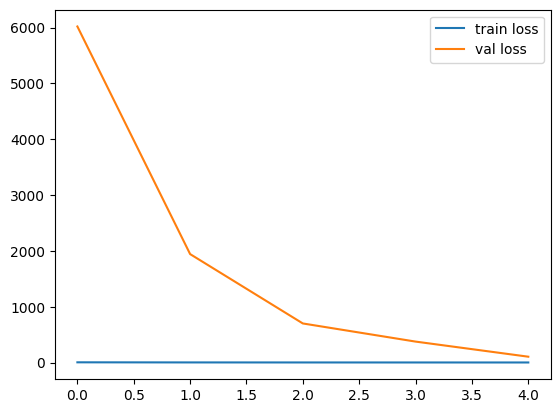

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(my_model.history['loss'], label='train loss')
plt.plot(my_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

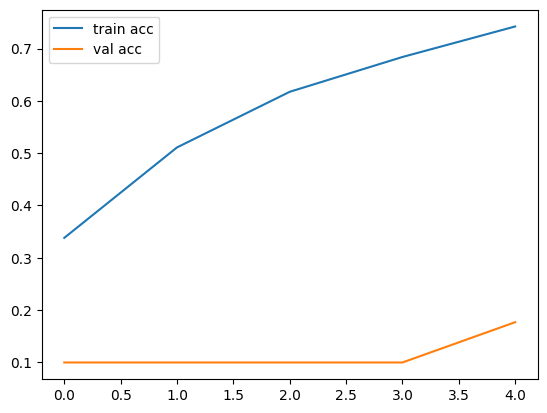

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(my_model.history['accuracy'], label='train acc')
plt.plot(my_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
my_model.unfreeze()
my_model.fit_one_cycle(20,slice(1e-4,1e-3))

AttributeError: ignored

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

NameError: ignored

In [ ]:
import imageio
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from PIL import Image
target_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
def run(source = None):
    model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Tomato Disease/AlexNetModel.hdf5')
    img = imageio.imread(source)
    img = Image.fromarray(img).resize((224, 224))
    x = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = x/255
    prediction = model.predict(x)
    print("Predicted Image is:",target_names[np.argmax(prediction)])
run(source=r'/content/drive/MyDrive/Tomato Disease/DataSetA/valid/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG')

ValueError: ignored